In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

%matplotlib inline
import pylab as pl
from IPython import display

In [39]:
def load_bin_file(samplerate=6.7e6, type="complex", bfile="../data/matched_filter", plot=False, start_us=0, end_us=0):
    if type not in ["complex", "real"]:
        print("data type must be complex or real.")
        exit()
    with open(bfile, "rb") as f:
        data = np.fromfile(f, dtype=np.float32)
    if type == "complex":
        data = data[::2] + 1j * data[1:][::2]
    acq_time_us = np.linspace(1, len(data), len(data)) / samplerate * 1e6
    start_index = np.where(acq_time_us>start_us)[0][0]
    if end_us == 0:
        end_index = len(acq_time_us) - 1
    else:
        end_index = np.where(acq_time_us>end_us)[0][0]
    if plot:
        plt.plot(acq_time_us[start_index:end_index], abs(data[start_index:end_index]), color="k")
        plt.grid()
        plt.ylabel("Amplitude")
        plt.xlabel("Time(us)")
        plt.show()
    return data

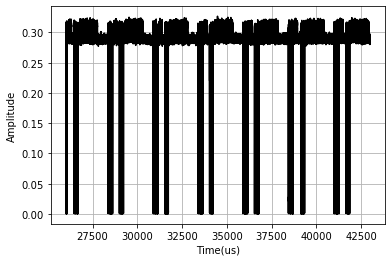

array([0.2782991 -0.08447547j, 0.2774751 -0.08761889j,
       0.27533877-0.08279695j, ..., 0.2853489 -0.02111887j,
       0.28757674-0.02233961j, 0.29038444-0.02783296j], dtype=complex64)

In [41]:
load_bin_file(plot=True, start_us=26000, end_us=43000, bfile="../misc/data/file_source_test")

In [78]:
def dynamic_plot(bfile="../misc/data/file_source_test", samplerate=6.7e6, _type="complex", debug_mode = False):
    start_us=0
    end_us=0
    if debug_mode:
        end_us=8000

    while 1: # infinite loop
        with open(bfile, "rb") as f:
            data = np.fromfile(f, dtype=np.float32)
        if _type == "complex":
            data = data[::2] + 1j * data[1:][::2]
        acq_time_us = np.linspace(1, len(data), len(data)) / samplerate * 1e6
        if len(acq_time_us) < end_us: # end_us exceeds the end
            break
        start_index = np.where(acq_time_us>start_us)[0][0]
        if debug_mode:
            # for debug mode, the end index is limited by end_us
            # otherwise, it will plot the whole data
            end_us += 3000
            end_index = np.where(acq_time_us>end_us)[0][0]
        else:
            end_index = len(acq_time_us) - 1
            
        real_x = acq_time_us[start_index:end_index]
        real_y = abs(data[start_index:end_index])
        
        
        plt.plot(real_x, real_y, color="k")
        plt.grid()
        plt.ylabel("Amplitude")
        plt.xlabel("Time(us)")
        
        # refresh the plot and udpate
        display.clear_output(wait=True)
        plt.gcf()
        plt.show()
        time.sleep(0.5)

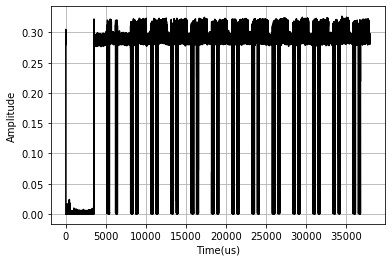

KeyboardInterrupt: 

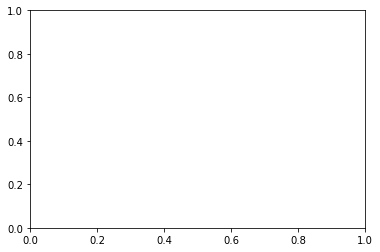

In [79]:
dynamic_plot(debug_mode = True)